<a href="https://colab.research.google.com/github/anastasiabf/Machine-Learning-Algorithms/blob/main/Machine_Learning_Algorithms_for_Classifying_Diabetic_Retinopathy_Severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import ClassifierChain

**READ DATASET**

In [3]:
data_train = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/DATASETS/EKSTRAKSI FITUR/data_svmcc_train.xlsx')
data_test = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/DATASETS/EKSTRAKSI FITUR/data_svmcc_test.xlsx')

In [ ]:
data_train = data_train.iloc[:, 0:10]
data_train

,maj axis MA,perimeter MA,min axis HM,maj axis HM,objects HM,perimeter HM,min axis EX,maj axis EX,perimeter EX,class
0,0.000000,0.000000,1.489547,3.316625,2,6.535534,1.005927,1.883247,3.414214,0
1,0.000000,0.000000,6.314841,8.134937,3,21.818615,0.000000,0.000000,0.000000,0
2,3.126944,6.242641,2.309401,3.126944,1,6.242641,1.313213,3.094343,5.198731,0
3,0.000000,0.000000,6.379952,10.009954,2,25.142135,0.465907,0.980959,1.707107,0
4,2.828427,4.828427,1.823808,3.092889,3,5.414214,0.381094,0.831075,1.482843,0
...,...,...,...,...,...,...,...,...,...,...
252,2.309401,3.414214,7.880993,12.262986,30,32.752999,1.855821,3.285691,6.530698,4
253,0.000000,0.000000,8.545190,12.401878,18,38.769708,6.461744,17.632672,43.397265,4
254,2.173065,4.707107,4.178193,6.087119,22,14.791880,3.220379,5.720428,12.685450,4
255,1.781736,2.560660,7.604281,11.355196,20,31.487206,2.164638,3.680730,7.495094,4


In [ ]:
data_test = data_test.iloc[:, 0:10]
data_test

,maj axis MA,perimeter MA,min axis HM,maj axis HM,objects HM,perimeter HM,min axis EX,maj axis EX,perimeter EX,class
0,0.000000,0.000000,2.989583,5.006452,4,11.035534,1.791455,3.074224,5.852937,0
1,0.000000,0.000000,3.322923,4.744864,1,11.071068,0.000000,1.632993,2.000000,0
2,1.632993,3.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,1.294911,2.000793,5,3.862742,1.603640,2.743455,5.201200,0
4,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.401103,2.706674,4.735104,0
...,...,...,...,...,...,...,...,...,...,...
58,2.669514,5.075825,5.784605,9.223058,36,23.439480,3.764828,6.623406,16.543401,4
59,2.164450,4.214214,4.813283,7.726751,31,19.084823,2.858895,5.544461,12.710107,4
60,6.194469,14.242641,6.773352,11.283921,31,28.998398,5.529832,11.077102,28.314196,4
61,3.653571,7.585584,5.442004,9.682068,31,23.894353,4.542042,7.887681,20.925693,4


**PLOT CLASS DISTRIBUTIONS**

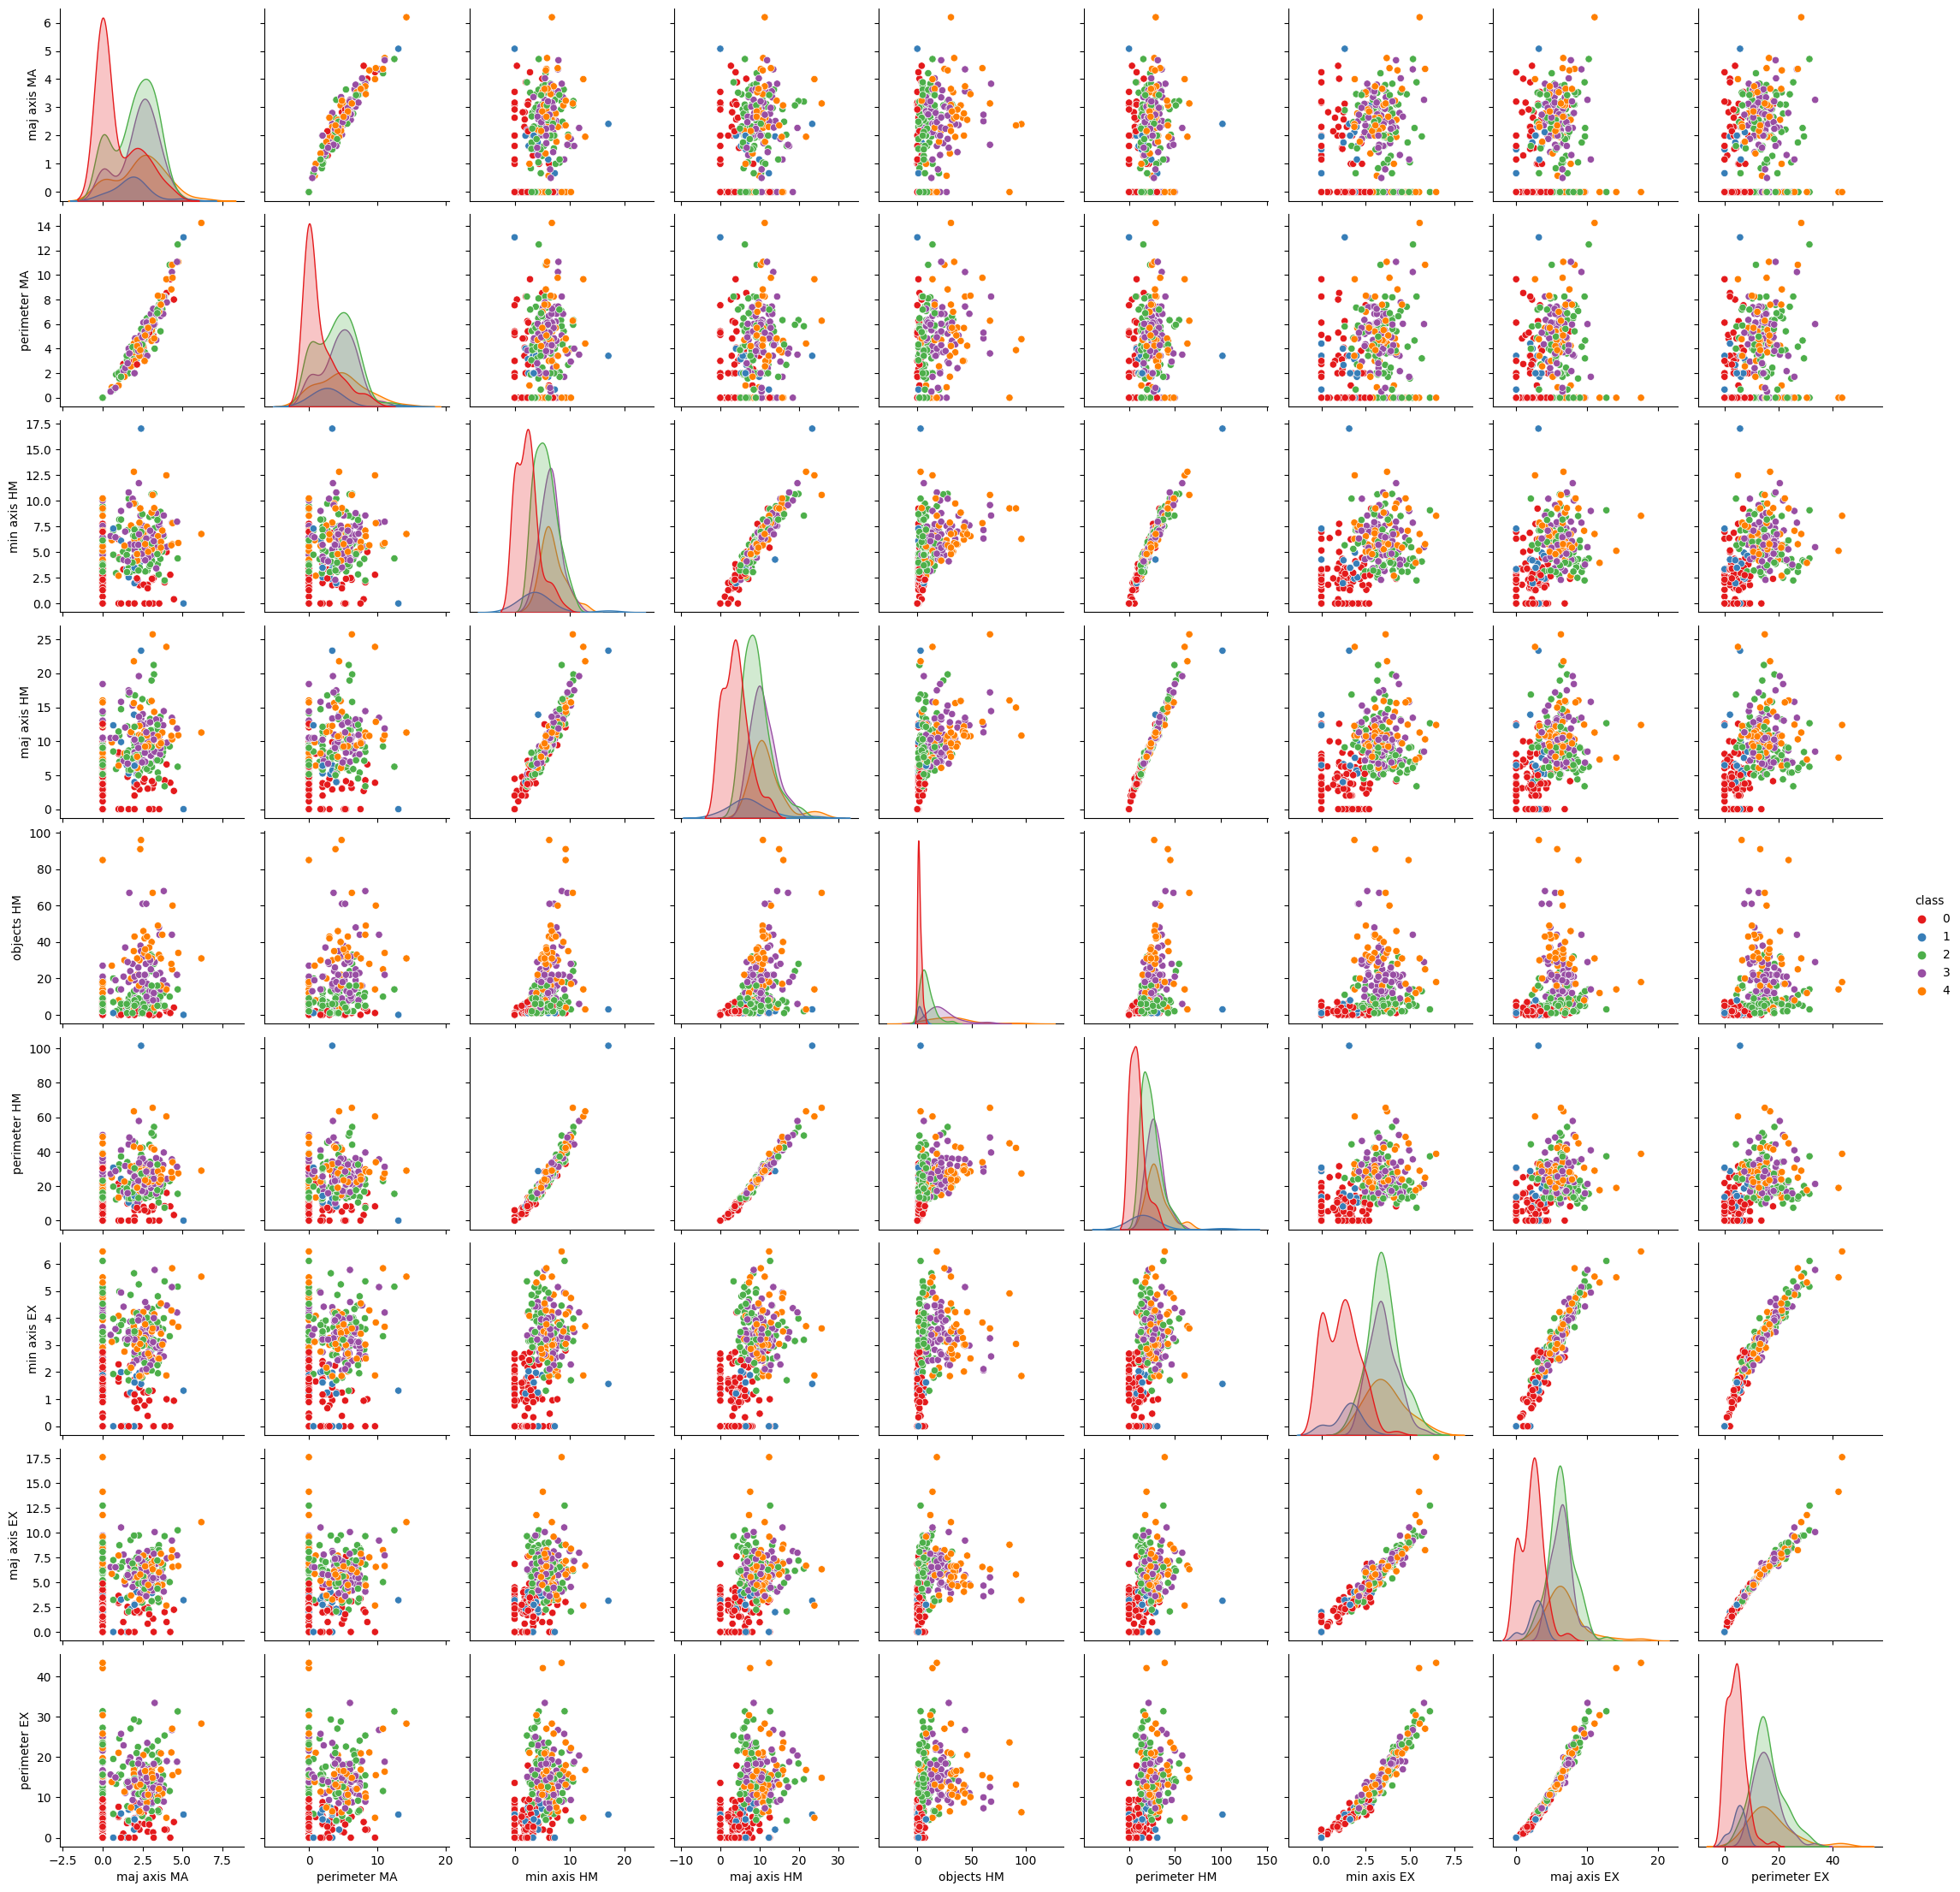

In [ ]:
data_svm = pd.concat([data_train, data_test])

# Membuat pairplot menggunakan seaborn
sns.pairplot(data_svm, hue = 'class', palette='Set1')

# 1. Multi-Label Support Vector Machine

utilizing RBF kernel and SMOTE

In [5]:
#@title
import pickle

# Separate features (x) and class (y)
x_train = data_train.iloc[:, 0:9]
y_train = data_train.iloc[:, 9]
x_test = data_test.iloc[:, 0:9]
y_test = data_test.iloc[:, 9]

# change class dimension into 2D
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# Reshape the target to match the shape expected by ClassifierChain
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the pipeline with scaler and SVM
pipeline = Pipeline([
    ('classifier', ClassifierChain(SVC(decision_function_shape = 'ovr')))
])

# Define parameter grid for grid search
param_grid = {'classifier__base_estimator__C': [0.1, 1, 10, 100, 1000],
              'classifier__base_estimator__gamma': [0.001, 0.01, 0.1, 1],
              'classifier__base_estimator__kernel': ['rbf']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model.set_params(**params)
    best_model.fit(x_train_resampled, y_train_resampled)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # or any other value that makes sense

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))
    print("F1-score pada data test:", f1)
    print()

Evaluation Metrics for Each Parameter Combination:
Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__gamma': 0.001, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.7936507936507936
Presisi pada data test: 0.8483062815769582
Recall pada data test: 0.7936507936507936
Spesifisitas pada data test: 0.9508343904157858
F1-score pada data test: 0.7966835633502299

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.746031746031746
Presisi pada data test: 0.8322625346434871
Recall pada data test: 0.746031746031746
Spesifisitas pada data test: 0.9408794926004228
F1-score pada data test: 0.7601824698598892

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__gamma': 0.1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.5396825396825397
Presisi pada data test: 0.6997635933806147
Recall

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__gamma': 0.1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.6349206349206349
Presisi pada data test: 0.7038548752834467
Recall pada data test: 0.6349206349206349
Spesifisitas pada data test: 0.89738548273432
F1-score pada data test: 0.6232471232471233

Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__gamma': 1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.3968253968253968
Presisi pada data test: 0.411056376573618
Recall pada data test: 0.3968253968253968
Spesifisitas pada data test: 0.8232558139534885
F1-score pada data test: 0.2884615384615385

Parameters: {'classifier__base_estimator__C': 10, 'classifier__base_estimator__gamma': 0.001, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.8888888888888888
Presisi pada data test: 0.8958175862937767
Recall pada data test: 0.8888888888888888
Spesifisitas pada data t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.6666666666666666
Presisi pada data test: 0.6869167869167869
Recall pada data test: 0.6666666666666666
Spesifisitas pada data test: 0.916093023255814
F1-score pada data test: 0.670428117796539

Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__gamma': 0.1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.6507936507936508
Presisi pada data test: 0.708994708994709
Recall pada data test: 0.6507936507936508
Spesifisitas pada data test: 0.904369274136716
F1-score pada data test: 0.651822780394209

Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__gamma': 1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.3968253968253968
Presisi pada data test: 0.411056376573618
Recall pada data test: 0.3968253968253968
Spesifisitas pada data 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Best Model (RBF Kernel)

Accuracy: 0.9523809523809523
Confusion Matrix:
[[19  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0 19  1  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0  8]]


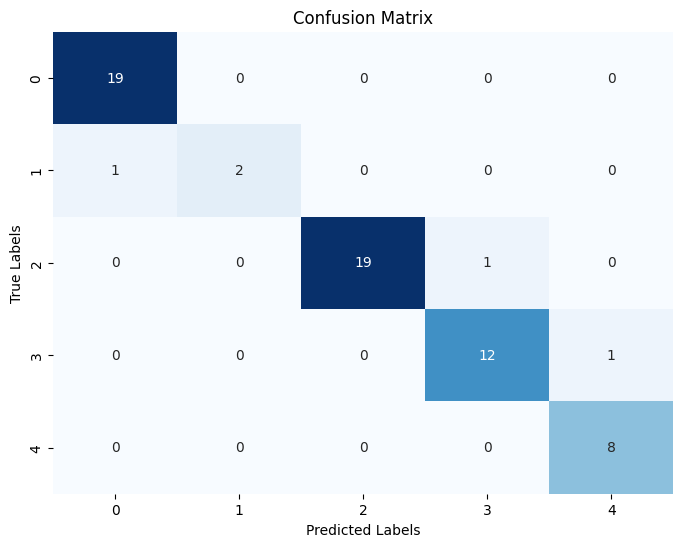

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.67      0.80         3
           2       1.00      0.95      0.97        20
           3       0.92      0.92      0.92        13
           4       0.89      1.00      0.94         8

    accuracy                           0.95        63
   macro avg       0.95      0.91      0.92        63
weighted avg       0.95      0.95      0.95        63

Best Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Evaluation Metrics for Each Parameter Combination:
Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.9523809523809523
Presisi pada data test: 0.9549382716049383
Recall pada data test: 0.9523809523809523
Spesifisitas pada data test: 0

In [ ]:
import pickle

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# Reshape the target to match the shape expected by ClassifierChain
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the pipeline with scaler and SVM
pipeline = Pipeline([
    ('classifier', ClassifierChain(SVC()))
])

# Define parameter grid for grid search
param_grid = {'classifier__base_estimator__C': [1],
              'classifier__base_estimator__gamma': [0.01],
              'classifier__base_estimator__kernel': ['rbf']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menyimpan model ke file
#with open('svmcc_model.pkl', 'wb') as file:
#    pickle.dump(best_model, file)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print confusion matrix with colored heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model.set_params(**params)
    best_model.fit(x_train_resampled, y_train_resampled)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # or any other value that makes sense

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))
    print("F1-score pada data test:", f1)
    print()

# 2. Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Accuracy: 0.7936507936507936
Confusion Matrix:
[[18  0  1  0  0]
 [ 1  2  0  0  0]
 [ 0  0 18  1  1]
 [ 0  0  1  6  6]
 [ 0  0  0  2  6]]


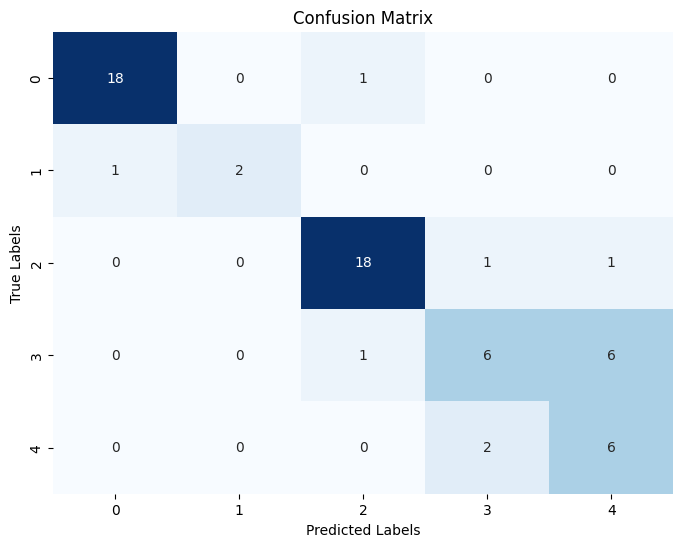

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.67      0.80         3
           2       0.90      0.90      0.90        20
           3       0.67      0.46      0.55        13
           4       0.46      0.75      0.57         8

    accuracy                           0.79        63
   macro avg       0.80      0.75      0.75        63
weighted avg       0.82      0.79      0.79        63

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Evaluation Metrics for Each Parameter Combination:


<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.7798941798941799
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9400465116279071
F1-score on test data: 0.7648033126293995



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8373015873015873
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9526976744186048
F1-score on test data: 0.8082457225314369



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7869717584003296
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9436828752642705
F1-score on test data: 0.7770493749396465



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8301972880920249
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9523340380549683
F1-score on test data: 0.8108297499601848



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7922077922077921
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9436828752642705
F1-score on test data: 0.7808549150654414



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8184349763297131
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9486976744186046
F1-score on test data: 0.793931993931994



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.7828409407356776
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9406976744186046
F1-score on test data: 0.7672364672364672



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8121819700767069
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9483340380549683
F1-score on test data: 0.7971306471306472



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.8123456790123457
Recall on test data: 0.7777777777777778
Specificity on test data: 0.945061310782241
F1-score on test data: 0.780993326531084



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8301972880920249
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9523340380549683
F1-score on test data: 0.8108297499601848



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8242069821017189
Recall on test data: 0.8095238095238095
Specificity on test data: 0.951970401691332
F1-score on test data: 0.8128337938864255



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.779281537176274
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9403340380549683
F1-score on test data: 0.7681183014516348



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8152218152218152
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9486976744186046
F1-score on test data: 0.794640280354566



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7997943576890945
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9446976744186047
F1-score on test data: 0.780792614332987



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7993487993487993
Recall on test data: 0.7777777777777778
Specificity on test data: 0.944046511627907
F1-score on test data: 0.7787672644815502



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7997943576890945
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9446976744186047
F1-score on test data: 0.780792614332987



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.826984126984127
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9523340380549683
F1-score on test data: 0.8113181504485851



<ipython-input-13-7b32d1c0a973>:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_resampled, y_train_resampled)


Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8301972880920249
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9523340380549683
F1-score on test data: 0.8108297499601848



In [13]:
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the Random Forest classifier
classifier = RandomForestClassifier()

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()

# 3. K-Nearest Neighbors (KNN)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7936507936507936
Confusion Matrix:
[[17  2  0  0  0]
 [ 1  2  0  0  0]
 [ 0  1 14  2  3]
 [ 0  0  1  9  3]
 [ 0  0  0  0  8]]


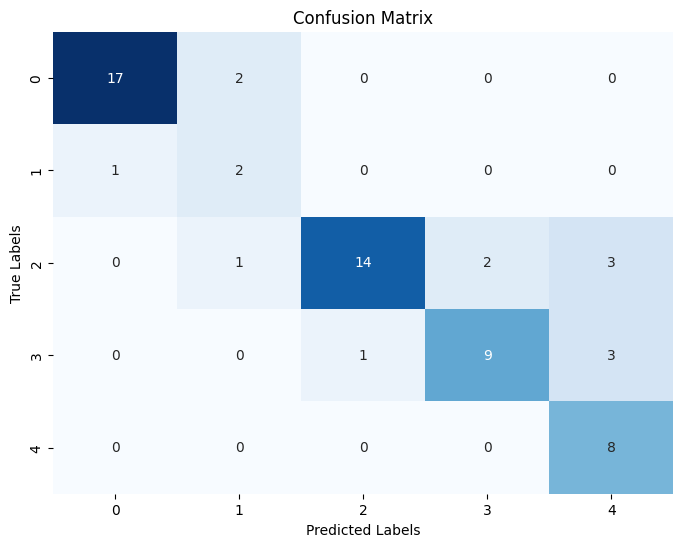

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.40      0.67      0.50         3
           2       0.93      0.70      0.80        20
           3       0.82      0.69      0.75        13
           4       0.57      1.00      0.73         8

    accuracy                           0.79        63
   macro avg       0.73      0.79      0.74        63
weighted avg       0.84      0.79      0.80        63

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Evaluation Metrics for Each Parameter Combination:
Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy on test data: 0.746031746031746
Precision on test data: 0.7577979339884103
Recall on test data: 0.746031746031746
Specificity on test data: 0.935244538407329
F1-score on test data: 0.746799717278789

Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy on test data: 0.746031746031746
Precision on test dat

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

 {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.8163235664636225
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9449711064129669
F1-score on test data: 0.787229632758088

Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy on test data: 0.8253968253968254
Precision on test data: 0.8412698412698413
Recall on test data: 0.8253968253968254
Specificity on test data: 0.9562889358703313
F1-score on test data: 0.8289132077951953

Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy on test data: 0.6984126984126984
Precision on test data: 0.7506519274376418
Recall on test data: 0.6984126984126984
Specificity on test data: 0.9270162085976039
F1-score on test data: 0.7068404641903608

Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8415698939508462
Recall on test data: 0.7936507936507936
Specificity on test data: 0.950985

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the K-Nearest Neighbors classifier
classifier = KNeighborsClassifier()

# Define parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()

# 4. Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4126984126984127
Confusion Matrix:
[[ 4  6  6  1  2]
 [ 0  1  0  2  0]
 [ 7  2 10  1  0]
 [ 0  0  2  5  6]
 [ 0  0  0  2  6]]


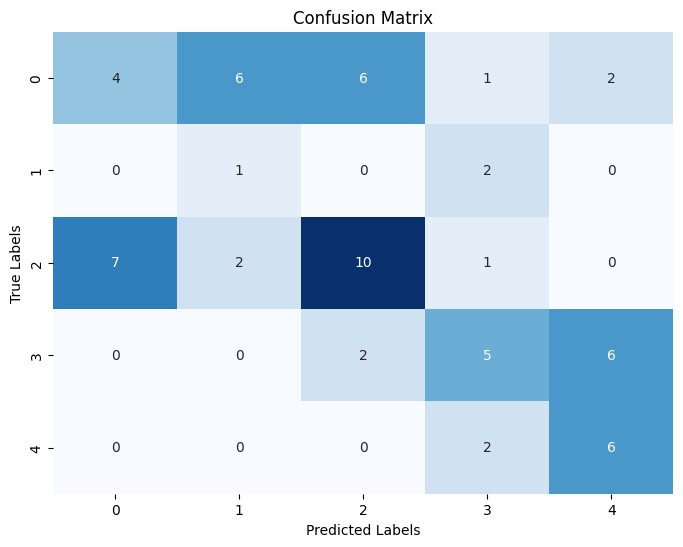

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.21      0.27        19
           1       0.11      0.33      0.17         3
           2       0.56      0.50      0.53        20
           3       0.45      0.38      0.42        13
           4       0.43      0.75      0.55         8

    accuracy                           0.41        63
   macro avg       0.38      0.44      0.38        63
weighted avg       0.44      0.41      0.41        63

Best Parameters: {}
Evaluation Metrics for Each Parameter Combination:
Parameters: {}
Accuracy on test data: 0.4126984126984127
Precision on test data: 0.43954282049520144
Recall on test data: 0.4126984126984127
Specificity on test data: 0.851214940098661
F1-score on test data: 0.41068707121338693



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.naive_bayes import MultinomialNB

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Define parameter grid for grid search (no hyperparameters for MultinomialNB)
param_grid = {}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()

# 5. Decision Trees

Accuracy: 0.7301587301587301
Confusion Matrix:
[[17  1  1  0  0]
 [ 1  2  0  0  0]
 [ 0  0 16  1  3]
 [ 0  0  2  8  3]
 [ 0  0  1  4  3]]


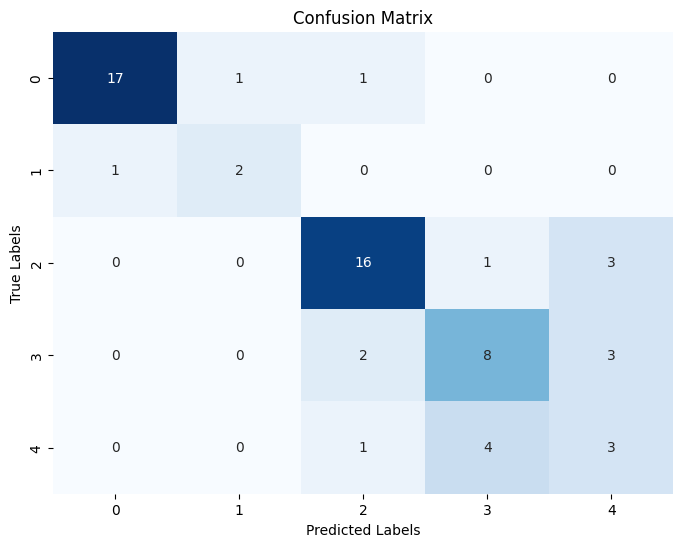

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.67      0.67      0.67         3
           2       0.80      0.80      0.80        20
           3       0.62      0.62      0.62        13
           4       0.33      0.38      0.35         8

    accuracy                           0.73        63
   macro avg       0.67      0.67      0.67        63
weighted avg       0.74      0.73      0.73        63

Best Parameters: {'max_depth': 20, 'min_samples_split': 10}
Evaluation Metrics for Each Parameter Combination:
Parameters: {'max_depth': None, 'min_samples_split': 2}
Accuracy on test data: 0.6984126984126984
Precision on test data: 0.7336953494848232
Recall on test data: 0.6984126984126984
Specificity on test data: 0.925213530655391
F1-score on test data: 0.7075855983419009

Parameters: {'max_depth': None, 'min_samples_split': 5}
Accuracy on test data: 0.746031746031746
Precision on

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Define parameter grid for grid search (Decision Tree hyperparameters)
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()

# 6. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7301587301587301
Confusion Matrix:
[[17  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  1 18  1  0]
 [ 0  0  3  1  9]
 [ 0  0  0  1  7]]


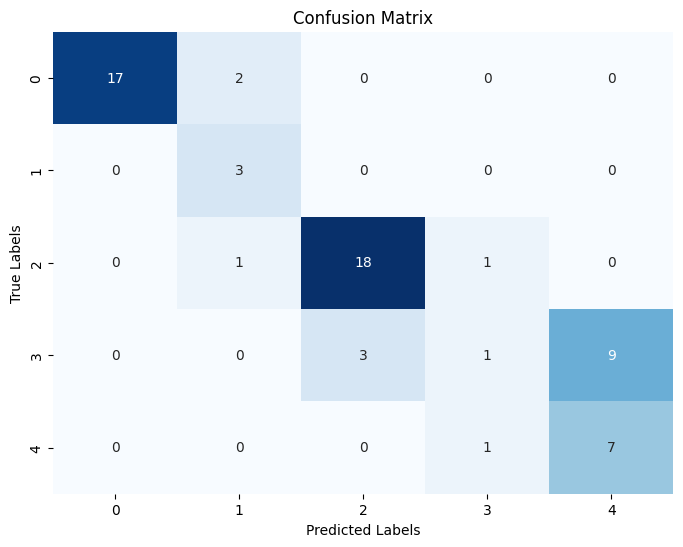

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.50      1.00      0.67         3
           2       0.86      0.90      0.88        20
           3       0.33      0.08      0.12        13
           4       0.44      0.88      0.58         8

    accuracy                           0.73        63
   macro avg       0.63      0.75      0.64        63
weighted avg       0.72      0.73      0.70        63

Best Parameters: {'C': 1.0, 'solver': 'liblinear'}
Evaluation Metrics for Each Parameter Combination:
Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy on test data: 0.7301587301587301
Precision on test data: 0.7548500881834216
Recall on test data: 0.7301587301587301
Specificity on test data: 0.9355912614517266
F1-score on test data: 0.735761308873437



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy on test data: 0.6666666666666666
Precision on test data: 0.713663243075008
Recall on test data: 0.6666666666666666
Specificity on test data: 0.9205764622973925
F1-score on test data: 0.6584131411375995

Parameters: {'C': 0.1, 'solver': 'sag'}
Accuracy on test data: 0.5873015873015873
Precision on test data: 0.6999838396897221
Recall on test data: 0.5873015873015873
Specificity on test data: 0.9022734319943622
F1-score on test data: 0.6235059046118954



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passe

Parameters: {'C': 0.1, 'solver': 'saga'}
Accuracy on test data: 0.5079365079365079
Precision on test data: 0.6558268891602225
Recall on test data: 0.5079365079365079
Specificity on test data: 0.8826680761099365
F1-score on test data: 0.5469886560112125

Parameters: {'C': 1.0, 'solver': 'lbfgs'}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8364558582603695
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9518336856941507
F1-score on test data: 0.8031530490504011

Parameters: {'C': 1.0, 'solver': 'liblinear'}
Accuracy on test data: 0.7301587301587301
Precision on test data: 0.7218442932728647
Recall on test data: 0.7301587301587301
Specificity on test data: 0.9353192389006342
F1-score on test data: 0.6951918527121779



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passe

Parameters: {'C': 1.0, 'solver': 'sag'}
Accuracy on test data: 0.5873015873015873
Precision on test data: 0.6999838396897221
Recall on test data: 0.5873015873015873
Specificity on test data: 0.9022734319943622
F1-score on test data: 0.6235059046118954

Parameters: {'C': 1.0, 'solver': 'saga'}
Accuracy on test data: 0.5079365079365079
Precision on test data: 0.6558268891602225
Recall on test data: 0.5079365079365079
Specificity on test data: 0.8826680761099365
F1-score on test data: 0.5469886560112125

Parameters: {'C': 10.0, 'solver': 'lbfgs'}
Accuracy on test data: 0.746031746031746
Precision on test data: 0.7860951078996191
Recall on test data: 0.746031746031746
Specificity on test data: 0.9401973220577873
F1-score on test data: 0.7569606760082951

Parameters: {'C': 10.0, 'solver': 'liblinear'}
Accuracy on test data: 0.6984126984126984
Precision on test data: 0.6961673558312215
Recall on test data: 0.6984126984126984
Specificity on test data: 0.9274404510218464
F1-score on test data:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [14]:
from sklearn.linear_model import LogisticRegression

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the Logistic Regression classifier
classifier = LogisticRegression()

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()

# 7. AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4444444444444444
Confusion Matrix:
[[ 0 15  4  0  0]
 [ 0  1  2  0  0]
 [ 0  0 15  5  0]
 [ 0  0  1 12  0]
 [ 0  0  0  8  0]]


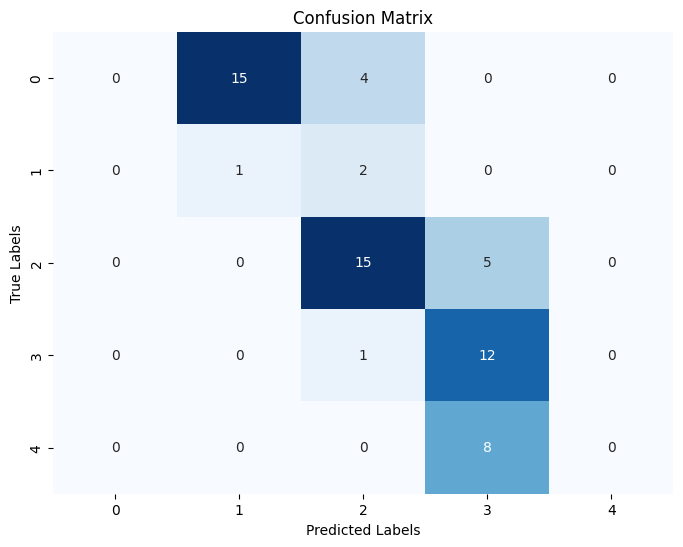

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.06      0.33      0.11         3
           2       0.68      0.75      0.71        20
           3       0.48      0.92      0.63        13
           4       0.00      0.00      0.00         8

    accuracy                           0.44        63
   macro avg       0.24      0.40      0.29        63
weighted avg       0.32      0.44      0.36        63

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Evaluation Metrics for Each Parameter Combination:
Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy on test data: 0.4444444444444444
Precision on test data: 0.31847402597402596
Recall on test data: 0.4444444444444444
Specificity on test data: 0.8654418604651163
F1-score on test data: 0.36209571547917413



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation

Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy on test data: 0.4603174603174603
Precision on test data: 0.44262917933130697
Recall on test data: 0.4603174603174603
Specificity on test data: 0.8510852713178295
F1-score on test data: 0.37690495733613477



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy on test data: 0.3333333333333333
Precision on test data: 0.13806568726781493
Recall on test data: 0.3333333333333333
Specificity on test data: 0.8244186046511628
F1-score on test data: 0.19454107906582377

Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy on test data: 0.3333333333333333
Precision on test data: 0.13806568726781493
Recall on test data: 0.3333333333333333
Specificity on test data: 0.8244186046511628
F1-score on test data: 0.19454107906582377



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy on test data: 0.3333333333333333
Precision on test data: 0.2412008281573499
Recall on test data: 0.3333333333333333
Specificity on test data: 0.8247667371388301
F1-score on test data: 0.21991341991341992



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy on test data: 0.3968253968253968
Precision on test data: 0.34656084656084657
Recall on test data: 0.3968253968253968
Specificity on test data: 0.8472783650458069
F1-score on test data: 0.34853212630990416

Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Accuracy on test data: 0.5555555555555556
Precision on test data: 0.6371882086167799
Recall on test data: 0.5555555555555556
Specificity on test data: 0.8913206483439042
F1-score on test data: 0.5432323151414824

Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Accuracy on test data: 0.5555555555555556
Precision on test data: 0.6275681989967704
Recall on test data: 0.5555555555555556
Specificity on test data: 0.8900028188865399
F1-score on test data: 0.538070358760014



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy on test data: 0.5555555555555556
Precision on test data: 0.6371882086167799
Recall on test data: 0.5555555555555556
Specificity on test data: 0.8913206483439042
F1-score on test data: 0.5432323151414824



In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the AdaBoost classifier
classifier = AdaBoostClassifier()

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()

# 8. GradientBoost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7936507936507936
Confusion Matrix:
[[19  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0 15  3  2]
 [ 0  0  1  7  5]
 [ 0  0  0  1  7]]


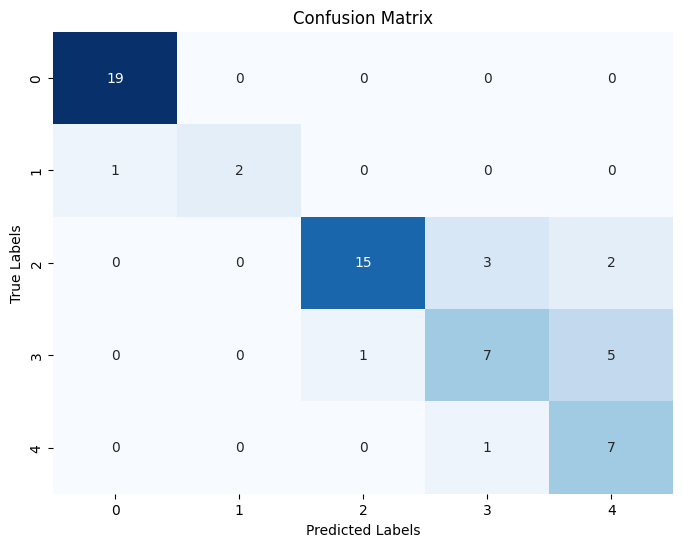

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.67      0.80         3
           2       0.94      0.75      0.83        20
           3       0.64      0.54      0.58        13
           4       0.50      0.88      0.64         8

    accuracy                           0.79        63
   macro avg       0.80      0.77      0.77        63
weighted avg       0.83      0.79      0.80        63

Best Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100}
Evaluation Metrics for Each Parameter Combination:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy on test data: 0.7142857142857143
Precision on test data: 0.7576719576719578
Recall on test data: 0.7142857142857143
Specificity on test data: 0.9286976744186047
F1-score on test data: 0.7263038548752834



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7990826633683776
Recall on test data: 0.7777777777777778
Specificity on test data: 0.943970401691332
F1-score on test data: 0.7813446246194783



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy on test data: 0.8253968253968254
Precision on test data: 0.8497693664360332
Recall on test data: 0.8253968253968254
Specificity on test data: 0.9563340380549683
F1-score on test data: 0.8274878947647826



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Accuracy on test data: 0.7142857142857143
Precision on test data: 0.7467858938447174
Recall on test data: 0.7142857142857143
Specificity on test data: 0.9284101479915433
F1-score on test data: 0.7235660149945865



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Accuracy on test data: 0.746031746031746
Precision on test data: 0.7727513227513229
Recall on test data: 0.746031746031746
Specificity on test data: 0.9363340380549683
F1-score on test data: 0.753214334166715



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.7881914381914383
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9413643410852712
F1-score on test data: 0.7626064411778699



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Accuracy on test data: 0.6666666666666666
Precision on test data: 0.6946156240273887
Recall on test data: 0.6666666666666666
Specificity on test data: 0.9148498942917547
F1-score on test data: 0.6765193765193765



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Accuracy on test data: 0.7301587301587301
Precision on test data: 0.7583435083435084
Recall on test data: 0.7301587301587301
Specificity on test data: 0.9313953488372093
F1-score on test data: 0.7372655577166853



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.7868347338935574
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9407131782945737
F1-score on test data: 0.764112503242938



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8320444987111654
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9516828752642705
F1-score on test data: 0.8096200096200097



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8472222222222222
Recall on test data: 0.8095238095238095
Specificity on test data: 0.952046511627907
F1-score on test data: 0.812025012025012



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.854300433623742
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9530613107822411
F1-score on test data: 0.8098140185096706



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.7924703214619182
Recall on test data: 0.7619047619047619
Specificity on test data: 0.941061310782241
F1-score on test data: 0.7662743141004009



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy on test data: 0.8412698412698413
Precision on test data: 0.8541847041847042
Recall on test data: 0.8412698412698413
Specificity on test data: 0.959970401691332
F1-score on test data: 0.841411592899007



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Accuracy on test data: 0.8253968253968254
Precision on test data: 0.8438271604938271
Recall on test data: 0.8253968253968254
Specificity on test data: 0.9563340380549683
F1-score on test data: 0.825167425167425



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Accuracy on test data: 0.746031746031746
Precision on test data: 0.7674264007597341
Recall on test data: 0.746031746031746
Specificity on test data: 0.9360620155038759
F1-score on test data: 0.7495446691262315



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8112874779541446
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9470317124735729
F1-score on test data: 0.7940652497043474



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7948900027847396
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9446976744186047
F1-score on test data: 0.7798623276884146



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 50}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.8001424501424502
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9413488372093024
F1-score on test data: 0.769591255305541



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8265512265512265
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9493488372093024
F1-score on test data: 0.7976782476782477



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.841026040045648
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9540155038759689
F1-score on test data: 0.8122818122818122



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 50}
Accuracy on test data: 0.7619047619047619
Precision on test data: 0.7943073266602679
Recall on test data: 0.7619047619047619
Specificity on test data: 0.9417124735729387
F1-score on test data: 0.770153041581613



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 100}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.8054414721081388
Recall on test data: 0.7777777777777778
Specificity on test data: 0.9446976744186047
F1-score on test data: 0.7840772566336477



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 200}
Accuracy on test data: 0.8095238095238095
Precision on test data: 0.8294280675233056
Recall on test data: 0.8095238095238095
Specificity on test data: 0.9516828752642705
F1-score on test data: 0.8100587759124342



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 50}
Accuracy on test data: 0.7936507936507936
Precision on test data: 0.8314814814814815
Recall on test data: 0.7936507936507936
Specificity on test data: 0.9493488372093024
F1-score on test data: 0.7987893587893587



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 100}
Accuracy on test data: 0.746031746031746
Precision on test data: 0.7148869648869649
Recall on test data: 0.746031746031746
Specificity on test data: 0.9340169133192389
F1-score on test data: 0.7288082640463592

Parameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 200}
Accuracy on test data: 0.7777777777777778
Precision on test data: 0.7909171075837743
Recall on test data: 0.7777777777777778
Specificity on test data: 0.943970401691332
F1-score on test data: 0.7809423844511564



In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the Gradient Boosting classifier
classifier = GradientBoostingClassifier()

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    classifier.set_params(**params)
    classifier.fit(x_train_resampled, y_train_resampled)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator
        else:
            specificity_i = 0

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Accuracy on test data:", accuracy)
    print("Precision on test data:", precision)
    print("Recall on test data:", recall)
    print("Specificity on test data:", np.mean(specificity))
    print("F1-score on test data:", f1)
    print()